In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [7]:
ci = pd.read_csv('./CI.csv'),# index_col='Id')
vlo = pd.read_csv('./VLO.csv'),# index_col='Id')
vz = pd.read_csv('./VZ.csv'),# index_col='Id')

In [20]:
vlo_new = vlo[0]
vz_new = vz[0]

ci_new = ci[0]
ci_new

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-11-13,198.270004,195.899994,197.800003,197.610001,1277900.0,191.483459
1,2017-11-14,197.669998,195.250000,197.229996,197.139999,1263100.0,191.028030
2,2017-11-15,197.410004,196.119995,196.619995,196.500000,1293500.0,190.407867
3,2017-11-16,201.339996,196.289993,196.699997,200.970001,1130100.0,194.739304
4,2017-11-17,200.210007,197.770004,199.910004,197.970001,980900.0,191.832321
...,...,...,...,...,...,...,...
1254,2022-11-07,327.369995,321.480011,324.000000,324.369995,1566600.0,324.369995
1255,2022-11-08,329.390015,321.179993,323.089996,327.739990,1349300.0,327.739990
1256,2022-11-09,331.049988,324.589996,328.709991,324.989990,1278000.0,324.989990
1257,2022-11-10,329.049988,315.630005,329.049988,323.339996,2063000.0,323.339996


1. Is there a company that has no difference between Close and Adj Close column? What does it mean from the financial point of view for the stock (you can get bonus partial points) ?

- as it can be seen from code below, there is no such a company
- the adj. close is the closing price adjusted for distributions of splits and dividend 



In [19]:
ci_new['Close'] == ci_new['Adj Close']

0       False
1       False
2       False
3       False
4       False
        ...  
1254     True
1255     True
1256     True
1257     True
1258     True
Length: 1259, dtype: bool

In [28]:
(ci_new['Close'] == ci_new['Adj Close']).all() == True

False

In [27]:
(vz_new['Close'] == vz_new['Adj Close']).all() == True

False

In [25]:
(vlo_new['Close'] == vlo_new['Adj Close']).all() == True

False

2. What is the highest and lowest price (Adj Close) each company recorded?
 - it can be seen below

In [32]:
.max()

327.739990234375

In [30]:
vz_new['Adj Close'].max()

58.36091232299805

In [31]:
vlo_new['Adj Close'].max()

145.0800018310547

3. (1pt task) Calculate logarithmic returns from Adj Close. For each company report on its, min, man, mean, median of the return distribution.

In [35]:
ci_new['log_ret'] = np.log(ci_new['Adj Close'])
vz_new['log_ret'] = np.log(vz_new['Adj Close'])
vlo_new['log_ret'] = np.log(vlo_new['Adj Close'])

In [36]:
ci_new

,Date,High,Low,Open,Close,Volume,Adj Close,log_ret
0,2017-11-13,198.270004,195.899994,197.800003,197.610001,1277900.0,191.483459,5.254801
1,2017-11-14,197.669998,195.250000,197.229996,197.139999,1263100.0,191.028030,5.252420
2,2017-11-15,197.410004,196.119995,196.619995,196.500000,1293500.0,190.407867,5.249168
3,2017-11-16,201.339996,196.289993,196.699997,200.970001,1130100.0,194.739304,5.271662
4,2017-11-17,200.210007,197.770004,199.910004,197.970001,980900.0,191.832321,5.256622
...,...,...,...,...,...,...,...,...
1254,2022-11-07,327.369995,321.480011,324.000000,324.369995,1566600.0,324.369995,5.781885
1255,2022-11-08,329.390015,321.179993,323.089996,327.739990,1349300.0,327.739990,5.792221
1256,2022-11-09,331.049988,324.589996,328.709991,324.989990,1278000.0,324.989990,5.783794
1257,2022-11-10,329.049988,315.630005,329.049988,323.339996,2063000.0,323.339996,5.778704


In [44]:
mean = ci_new['log_ret'].mean()
median = ci_new['log_ret'].median()
minim = ci_new['log_ret'].min()
maxim = ci_new['log_ret'].max()

print('For CI the mean is of returns:', mean, ',median is:', median, ',minimum is:', minim,',maximum is:', maxim)

For CI the mean is of returns: 5.289589527090317 ,median is: 5.2831262699560915 ,minimum is: 4.837183343409718 ,maximum is: 5.792220581321211


In [45]:
mean = vz_new['log_ret'].mean()
median = vz_new['log_ret'].median()
minim = vz_new['log_ret'].min()
maxim = vz_new['log_ret'].max()

print('For VZ the mean is of returns:', mean, ',median is:', median, ',minimum is:', minim,',maximum is:', maxim)

For VZ the mean is of returns: 3.9083185950904467 ,median is: 3.940781141514208 ,minimum is: 3.5652983491776897 ,maximum is: 4.066646356208853


In [46]:
mean = vlo_new['log_ret'].mean()
median = vlo_new['log_ret'].median()
minim = vlo_new['log_ret'].min()
maxim = vlo_new['log_ret'].max()

print('For VLO the mean is of returns:', mean, ',median is:', median, ',minimum is:', minim,',maximum is:', maxim)

For VLO the mean is of returns: 4.298786101362266 ,median is: 4.299794661732045 ,minimum is: 3.367794707391175 ,maximum is: 4.977285327035702


4. When did each company record the highest gain and highest loss for the day? (logarithmic loss). Hint: idxmax

In [65]:
#loss
ci_new['loss'] = (np.log(ci_new['Open']) - np.log(ci_new['Close']))
vz_new['loss'] = (np.log(vz_new['Open']) - np.log(vz_new['Close']))
vlo_new['loss'] = (np.log(vlo_new['Open']) - np.log(vlo_new['Close']))

In [67]:
#gain
ci_new['gain'] = (np.log(ci_new['Close']) - np.log(ci_new['Open']))
vz_new['gain'] = (np.log(vz_new['Close']) - np.log(vz_new['Open']))
vlo_new['gain'] = (np.log(vlo_new['Close']) - np.log(vlo_new['Open']))

In [73]:
print (' CI index {} with a difference of loss of {}'.format(ci_new['loss'].idxmax(), ci_new['loss'].max()))
print (' VZ index {} with a difference of loss of {}'.format(vz_new['loss'].idxmax(), vz_new['loss'].max()))
print (' VLO index {} with a difference of loss of {}'.format(vlo_new['loss'].idxmax(), vlo_new['loss'].max()))

print (' CI index {} with a difference of gain of {}'.format(ci_new['gain'].idxmax(), ci_new['gain'].max()))
print (' VZ index {} with a difference of gain of {}'.format(vz_new['gain'].idxmax(), vz_new['gain'].max()))
print (' VLO index {} with a difference of gain of {}'.format(vlo_new['gain'].idxmax(), vlo_new['gain'].max()))

 CI index 356 with a difference of loss of 0.09865111350359435
 VZ index 1232 with a difference of loss of 0.04217417238599408
 VLO index 591 with a difference of loss of 0.1343358595919666
 CI index 596 with a difference of gain of 0.09108925886436481
 VZ index 594 with a difference of gain of 0.07663985161405051
 VLO index 609 with a difference of gain of 0.11472062375244407


In [78]:
# LOSS DATE
print(ci_new.loc[ci_new['loss'] == 0.09865111350359435]) # 2019-04-16 date
print(vz_new.loc[vz_new['loss'] == 0.04217417238599408]) #2022-10-06 
print(vlo_new.loc[vlo_new['loss'] == 0.1343358595919666]) # 2020-03-23 

           Date        High         Low        Open       Close     Volume  \
356  2019-04-16  167.259995  150.509995  166.699997  151.039993  6383100.0   

      Adj Close   log_ret      loss      gain  
356  146.427094  4.986528  0.098651 -0.098651  
            Date   High    Low       Open  Close      Volume  Adj Close  \
1232  2022-10-06  39.66  37.77  39.470001  37.84  36663300.0      37.84   

       log_ret      loss      gain  
1232  3.633367  0.042174 -0.042174  
           Date       High        Low       Open      Close     Volume  \
591  2020-03-23  37.779999  32.459999  37.310001  32.619999  6535300.0   

     Adj Close   log_ret      loss      gain  
591  29.014471  3.367795  0.134336 -0.134336  


,Date,High,Low,Open,Close,Volume,Adj Close,log_ret,loss,gain
594,2020-03-26,53.900002,49.509998,49.59,53.540001,32610900.0,48.993931,3.891696,-0.07664,0.07664


In [79]:
print(ci_new.loc[ci_new['gain'] == 0.09108925886436481]) # 2020-03-30 
print(vz_new.loc[vz_new['gain'] == 0.07663985161405051]) # 2020-03-26
print(vlo_new.loc[vlo_new['gain'] == 0.11472062375244407]) # 2020-04-17

           Date        High         Low        Open       Close     Volume  \
596  2020-03-30  178.940002  162.740005  162.740005  178.259995  3677400.0   

      Adj Close   log_ret      loss      gain  
596  172.851105  5.152431 -0.091089  0.091089  
           Date       High        Low   Open      Close      Volume  \
594  2020-03-26  53.900002  49.509998  49.59  53.540001  32610900.0   

     Adj Close   log_ret     loss     gain  
594  48.993931  3.891696 -0.07664  0.07664  
           Date   High    Low       Open      Close     Volume  Adj Close  \
609  2020-04-17  51.91  45.75  46.150002  51.759998  6855700.0  46.038906   

      log_ret      loss      gain  
609  3.829487 -0.114721  0.114721  


5.What is the average calendar weekly volume for each company? Hint: check how to
resample pandas DF

In [88]:
ci_new['Date'] = pd.to_datetime(ci_new['Date'])
(ci_new.groupby([pd.Grouper(key = 'Date', freq = 'W')])
.agg(average_volume_per_week = ('Volume' , 'mean'))
.round())

,average_volume_per_week
Date,
2017-11-19,1189100.0
2017-11-26,788075.0
2017-12-03,1686280.0
2017-12-10,1172100.0
2017-12-17,1567700.0
...,...
2022-10-16,2349100.0
2022-10-23,1951360.0
2022-10-30,1627800.0


In [91]:
vz_new['Date'] = pd.to_datetime(vz_new['Date'])
(vz_new.groupby([pd.Grouper(key = 'Date', freq = 'W')])
.agg(average_volume_per_week = ('Volume' , 'mean'))
.round())

,average_volume_per_week
Date,
2017-11-19,17196300.0
2017-11-26,13186925.0
2017-12-03,25348560.0
2017-12-10,15973660.0
2017-12-17,20372040.0
...,...
2022-10-16,26361000.0
2022-10-23,33241980.0
2022-10-30,25352360.0


In [92]:
vlo_new['Date'] = pd.to_datetime(vlo_new['Date'])
(vlo_new.groupby([pd.Grouper(key = 'Date', freq = 'W')])
.agg(average_volume_per_week = ('Volume' , 'mean'))
.round())

,average_volume_per_week
Date,
2017-11-19,3203840.0
2017-11-26,2896625.0
2017-12-03,3697340.0
2017-12-10,3376940.0
2017-12-17,3739180.0
...,...
2022-10-16,3771060.0
2022-10-23,4182840.0
2022-10-30,3858540.0


6. Which company recorded the highest total return over the whole period?

7. Plot the log-returns of the companies (ideally in the same plot)

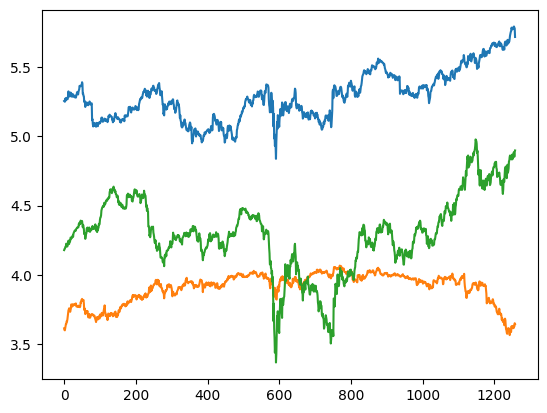

In [95]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.plot(ci_new['log_ret'])
ax1.plot(vz_new['log_ret'])
ax1.plot(vlo_new['log_ret'])

8. Show the log-return distribution of the companies (ideally in the same plot)

In [ ]:
ci_new['log_ret'].hist(bins=10)